## 1. Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 2. Load Data

In [132]:
df_train = pd.read_csv('../Iteration_1_Baseline/train_iter_1.csv',
                      index_col = 0)
df_test = pd.read_csv('../Iteration_1_Baseline/test_iter_1.csv',
                     index_col = 0)

In [133]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter
0,0.0,3,0,22.0,1,0,7.2500,0.0,7
1,1.0,1,1,38.0,1,0,71.2833,1.0,2
2,1.0,3,1,26.0,0,0,7.9250,0.0,7
3,1.0,1,1,35.0,1,0,53.1000,0.0,2
4,0.0,3,0,35.0,0,0,8.0500,0.0,7
5,0.0,3,0,25.0,0,0,8.4583,2.0,7
6,0.0,1,0,54.0,0,0,51.8625,0.0,4
7,0.0,3,0,2.0,3,1,21.0750,0.0,7
8,1.0,3,1,27.0,0,2,11.1333,0.0,7
9,1.0,2,1,14.0,1,0,30.0708,1.0,7


In [134]:
df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter
0,3,0,34.5,0,0,7.8292,2.0,7
1,3,1,47.0,1,0,7.0000,0.0,7
2,2,0,62.0,0,0,9.6875,2.0,7
3,3,0,27.0,0,0,8.6625,0.0,7
4,3,1,22.0,1,1,12.2875,0.0,7
5,3,0,14.0,0,0,9.2250,0.0,7
6,3,1,30.0,0,0,7.6292,2.0,7
7,2,0,26.0,1,1,29.0000,0.0,7
8,3,1,18.0,0,0,7.2292,1.0,7
9,3,0,21.0,2,0,24.1500,0.0,7


In [135]:
idx_train = df_train.index
idx_test = df_test.index
df_all = pd.concat([df_train, df_test],
                  axis = 0, sort = False)
df_all.reset_index(drop = True,
                inplace = True)
df_all

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter
0,0.0,3,0,22.0,1,0,7.2500,0.0,7
1,1.0,1,1,38.0,1,0,71.2833,1.0,2
2,1.0,3,1,26.0,0,0,7.9250,0.0,7
3,1.0,1,1,35.0,1,0,53.1000,0.0,2
4,0.0,3,0,35.0,0,0,8.0500,0.0,7
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,8.0500,0.0,7
1305,NaN,1,1,39.0,0,0,108.9000,1.0,2
1306,NaN,3,0,38.5,0,0,7.2500,0.0,7
1307,NaN,3,0,25.0,0,0,8.0500,0.0,7


## 3. Feature Engineering

In this iteration I will change the continuous numerical features (age and fare) to discrete numerical feature using coarse binning method.

At the end I will standardize the variables again.

### 3.1. Age

In [119]:
df_train['Binned_Age'] = pd.cut(df_train['Age'], 
                              bins = 50)
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter,Binned_Age
0,0.0,3,0,22.0,1,0,7.2500,0.0,7,"(21.111, 22.702]"
1,1.0,1,1,38.0,1,0,71.2833,1.0,2,"(37.027, 38.618]"
2,1.0,3,1,26.0,0,0,7.9250,0.0,7,"(25.886, 27.477]"
3,1.0,1,1,35.0,1,0,53.1000,0.0,2,"(33.844, 35.435]"
4,0.0,3,0,35.0,0,0,8.0500,0.0,7,"(33.844, 35.435]"
5,0.0,3,0,25.0,0,0,8.4583,2.0,7,"(24.294, 25.886]"
6,0.0,1,0,54.0,0,0,51.8625,0.0,4,"(52.943, 54.534]"
7,0.0,3,0,2.0,3,1,21.0750,0.0,7,"(0.34, 2.012]"
8,1.0,3,1,27.0,0,2,11.1333,0.0,7,"(25.886, 27.477]"
9,1.0,2,1,14.0,1,0,30.0708,1.0,7,"(13.153, 14.744]"


Now we calculate WOE and IV of each range of age.

In [120]:
df_age = df_train[['Survived','Binned_Age']]
df_age = df_age.groupby(by = 'Binned_Age',
                       axis = 0).sum()
df_age.rename(columns = {'Survived':'#Event'},
             inplace = True)
df_age['Count'] = df_train.groupby(by = 'Binned_Age',
                                   axis = 0)['Binned_Age'].count()
df_age['#Non_Event'] = df_age.apply(lambda x: x['Count'] - x['#Event'], axis = 1)
df_age['Event%'] = df_age.apply(lambda x: 100*x['#Event']/x['Count'] if x['Count'] > 0 else 0, axis = 1)
df_age.drop(df_age[(df_age['Count'] == 0) | (df_age['#Non_Event'] == 0) | (df_age['#Event'] == 0)].index,
           axis = 0,
           inplace = True)
df_age['Non_Event%'] = df_age.apply(lambda x: 100*x['#Non_Event']/x['Count'] if x['Count'] > 0 else 0, axis = 1)
df_age['WOE'] = df_age.apply(lambda x: np.log(x['Event%']/x['Non_Event%']), axis = 1)
df_age['Event%-Non_Event%'] = df_age.apply(lambda x: x['Event%'] - x['Non_Event%'], axis = 1)
df_age['IV'] = df_age.apply(lambda x: (x['Event%-Non_Event%']/100)*x['WOE'], axis = 1)
df_age.reset_index(inplace = True)
df_age

,Binned_Age,#Event,Count,#Non_Event,Event%,Non_Event%,WOE,Event%-Non_Event%,IV
0,"(0.34, 2.012]",15.0,24,9.0,62.500000,37.500000,0.510826,25.000000,0.127706
1,"(2.012, 3.603]",5.0,6,1.0,83.333333,16.666667,1.609438,66.666667,1.072959
2,"(3.603, 5.195]",11.0,14,3.0,78.571429,21.428571,1.299283,57.142857,0.742447
3,"(5.195, 6.786]",2.0,7,5.0,28.571429,71.428571,-0.916291,-42.857143,0.392696
4,"(6.786, 8.378]",3.0,7,4.0,42.857143,57.142857,-0.287682,-14.285714,0.041097
5,"(8.378, 9.97]",2.0,8,6.0,25.000000,75.000000,-1.098612,-50.000000,0.549306
6,"(9.97, 11.561]",1.0,6,5.0,16.666667,83.333333,-1.609438,-66.666667,1.072959
7,"(13.153, 14.744]",3.0,16,13.0,18.750000,81.250000,-1.466337,-62.500000,0.916461
8,"(14.744, 16.336]",13.0,25,12.0,52.000000,48.000000,0.080043,4.000000,0.003202
9,"(16.336, 17.928]",6.0,13,7.0,46.153846,53.846154,-0.154151,-7.692308,0.011858


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '(54.534, 56.126]'),
  Text(0.0, 0, '(0.34, 2.012]'),
  Text(5.0, 0, '(8.378, 9.97]'),
  Text(10.0, 0, '(17.928, 19.519]'),
  Text(15.0, 0, '(25.886, 27.477]'),
  Text(20.0, 0, '(33.844, 35.435]'),
  Text(25.0, 0, '(41.802, 43.393]'),
  Text(30.0, 0, '(49.76, 51.351]'),
  Text(35.0, 0, '(59.309, 60.901]'),
  Text(40.0, 0, '')])

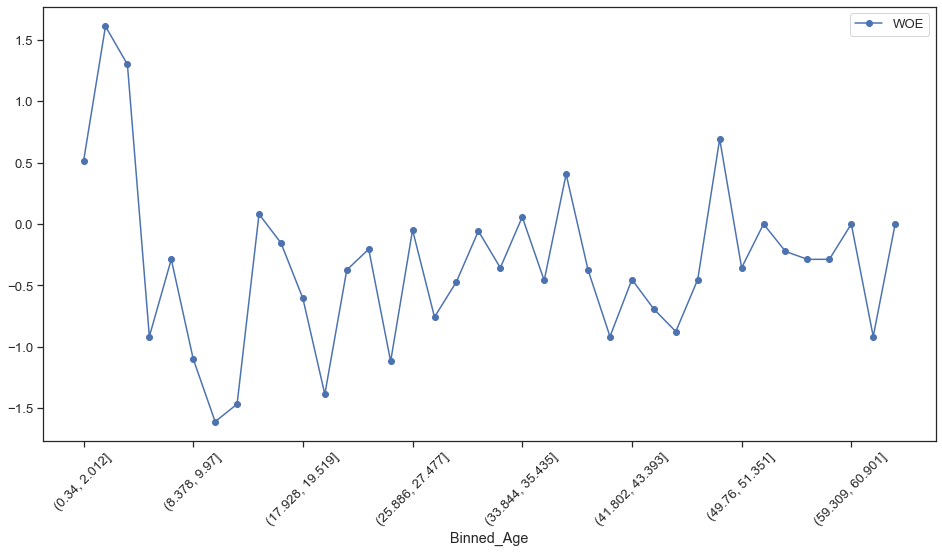

In [121]:
fig, ax = plt.subplots(figsize = (16,8))
sns.set(font_scale = 1.2)
sns.set_style('ticks')

df_age.plot(x = 'Binned_Age',
                                 y = 'WOE',
                                 marker = 'o',
                                 ax = ax)
plt.xticks(rotation = 45)

The ranges to be used are 0-5, 5-15, 15-21, 21-28, 28-39, 39-48, 48-Inf. Something like, child-Teenager-Young-Young Adult-Adult-Middle Age-Rest.

In [145]:
df_all['Binned_Age'] = np.where(df_all['Age'] <= 5, 0, df_all['Binned_Age'])
df_all['Binned_Age'] = np.where((df_all['Age'] > 5) & (df_all['Age'] <= 15), 1, df_all['Binned_Age'])
df_all['Binned_Age'] = np.where((df_all['Age'] > 15) & (df_all['Age'] <= 21), 2, df_all['Binned_Age'])
df_all['Binned_Age'] = np.where((df_all['Age'] > 21) & (df_all['Age'] <= 28), 3, df_all['Binned_Age'])
df_all['Binned_Age'] = np.where((df_all['Age'] > 28) & (df_all['Age'] <= 39), 4, df_all['Binned_Age'])
df_all['Binned_Age'] = np.where((df_all['Age'] > 39) & (df_all['Age'] <= 48), 5, df_all['Binned_Age'])
df_all['Binned_Age'] = np.where((df_all['Age'] > 48), 6, df_all['Binned_Age'])
df_all.groupby('Binned_Age')['Pclass'].count()

Binned_Age
0.0     56
1.0     75
2.0    180
3.0    434
4.0    290
5.0    155
6.0    119
Name: Pclass, dtype: int64

### 3.